In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
sirovi_podaci = pd.read_csv('drug_consumption.data')
sirovi_podaci #fale imena atributa

#procitano sa sajtu podataka 
kolone = ["ID", "Age", "Gender", "Education", "Country", "Ethnicity", 
            "Nscore", "Escore", "Oscore", "Ascore", "Cscore", "Impulsiveness", "SS", 
            "Alchocol", "Amphet", "Amyl", "Benzos", "Caff", "Canabis", "Choc", "Coke", "Crack", "Ecstasy", 
            "Heroin", "Ketamin", "LegalH", "LSD", "Meth", "Mushrooms", "Nicotine", "Semer", "VSA"]

sirovi_podaci = pd.read_csv('drug_consumption.data', names = kolone)

podaci = sirovi_podaci.copy()

#ID mi ne igra nikakvu ulogu svakako
podaci = podaci.drop('ID', axis = 1)


In [4]:
# posto imamo vise klasa koje ispitujemo, razdvajam podatke na atribute i na klase
podaci.head()

#izdvajanje atributa
atributi1 = podaci.columns
atributi1

atributi = []
for atribut in atributi1:
    if atribut == 'Alchocol':
        break
    atributi.append(atribut)
    
print(atributi, end = ', ')

['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsiveness', 'SS'], 

In [5]:
#izdvajanje klasa
klase = []
for atribut in atributi1:
    if atribut not in atributi:
        klase.append(atribut)
        
print(klase, end = ', ')
print()

# provera deljenja kolona
print(len(klase) + len(atributi) == len(podaci.columns))

['Alchocol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Canabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamin', 'LegalH', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA'], 
True


In [32]:
podaci_skalirano = podaci.copy()

n = len(podaci_skalirano['Heroin'])
    
for x in klase:
    for i in range(n):
        podaci_skalirano[x][i] = int(podaci_skalirano[x][i].strip('CL'))
#     print(podaci_skalirano[x].unique())
        

podaci_skalirano

/tmp/ipykernel_6313/1849350641.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  podaci_skalirano[x][i] = int(podaci_skalirano[x][i].strip('CL'))


,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamin,LegalH,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,2,0,0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,4,0,2,0,2,3,0,4,0,0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,1,0,0,0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,2,0,0,0,0,2,0,0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,1,0,0,1,0,0,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,0,0,0,3,3,0,0,0,0,5
1881,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,2,0,0,3,5,4,4,5,0,0
1882,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,4,0,2,0,2,0,2,6,0,0
1883,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,3,0,0,3,3,0,3,4,0,0


In [33]:
for x in klase:
    podaci_skalirano = podaci_skalirano.drop(x, axis = 1)

In [35]:
# podaci_skalirano

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(podaci_skalirano), columns = podaci_skalirano.columns)

In [38]:
X

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsiveness,SS
0,0.409137,1.0,0.537681,1.000000,0.409061,0.560562,0.412116,0.435690,0.367654,0.499040,0.428474,0.224398
1,0.246475,0.0,1.000000,1.000000,0.262143,0.413474,0.796106,0.762567,0.609827,0.479394,0.337920,0.465658
2,0.409137,0.0,0.537681,1.000000,0.262143,0.444788,0.622976,0.392939,0.266061,0.353580,0.215401,0.619957
3,0.000000,1.0,0.814329,1.000000,0.262143,0.492045,0.376883,0.527023,0.585213,0.584415,0.215401,0.224398
4,0.409137,1.0,1.000000,1.000000,0.262143,0.623275,0.250544,0.456995,0.456454,0.688508,0.428474,0.465658
...,...,...,...,...,...,...,...,...,...,...,...,...
1880,0.000000,1.0,0.412820,0.000000,0.262143,0.336890,0.765875,0.835399,0.609827,0.335773,0.629735,1.000000
1881,0.000000,0.0,0.412820,0.000000,0.262143,0.477550,0.765875,0.624600,0.609827,0.280854,0.629735,0.710933
1882,0.246475,1.0,0.653938,0.000000,0.262143,0.682246,0.289795,0.323599,0.244253,0.300104,0.565343,0.388117
1883,0.000000,1.0,0.412820,0.000000,0.262143,0.649318,0.206510,0.577652,0.266061,0.128634,0.705068,0.825752


In [39]:
from sklearn.cluster import KMeans

In [50]:
kmeans = KMeans(n_clusters=3, n_init='auto')

In [51]:
kmeans.fit(X)

KMeans(n_clusters=3, n_init='auto')

In [52]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=podaci_skalirano.columns)
centers

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsiveness,SS
0,0.346937,1.000000,0.617104,0.936549,0.260395,0.512444,0.516192,0.471166,0.542764,0.549117,0.410486,0.409738
1,0.361437,0.000000,0.544719,0.955210,0.257366,0.477552,0.504615,0.505452,0.477515,0.495037,0.471482,0.507343
2,0.157890,0.335188,0.488555,0.054286,0.273263,0.539449,0.481164,0.603389,0.472755,0.455177,0.525978,0.632462


In [53]:
kmeans.inertia_

731.359811004764

In [54]:
podaci[kmeans.labels_ == 1]

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamin,LegalH,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
7,0.49788,-0.48246,-1.73790,0.96082,-0.31685,-1.32828,1.93886,-0.84732,-0.30172,1.63088,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
9,1.82213,-0.48246,1.16365,0.96082,-0.31685,-0.24649,0.00332,-1.42424,0.59042,0.12331,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
15,1.82213,-0.48246,0.45468,0.96082,-0.31685,-2.05048,-1.50796,-1.55521,-1.07533,1.13407,...,CL1,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1813,1.09449,-0.48246,0.45468,0.96082,-0.31685,-1.86962,0.00332,0.14143,-0.76096,-0.14277,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0
1821,-0.07854,-0.48246,0.45468,0.96082,-0.50212,-0.46725,-1.50796,-0.58331,-0.30172,-0.40581,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
1840,1.09449,-0.48246,1.98437,0.96082,-0.31685,-0.24649,-0.80615,-0.01928,-1.62090,-0.14277,...,CL2,CL1,CL1,CL2,CL1,CL1,CL1,CL6,CL0,CL1
1876,-0.07854,-0.48246,-0.61113,0.24923,0.11440,-0.14882,-0.57545,1.43533,-0.91699,-0.78155,...,CL3,CL0,CL3,CL5,CL3,CL0,CL4,CL2,CL0,CL2


In [55]:
from sklearn.metrics import silhouette_samples

silhouette_values = silhouette_samples(X, kmeans.labels_)
silhouette_values

array([ 0.47273257,  0.35171028,  0.44471574, ...,  0.09516667,
        0.20958801, -0.0310405 ])

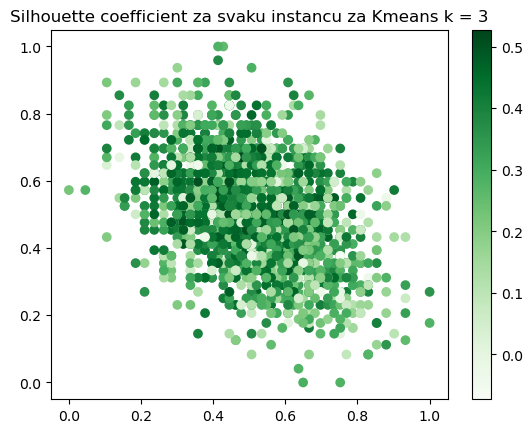

In [56]:
plt.scatter(X['Nscore'], X['Escore'], c = silhouette_values, cmap="Greens")
plt.colorbar()
plt.title("Silhouette coefficient za svaku instancu za Kmeans k = 3")
plt.show()
